# Linear Regression with sklearn API

Objective: Build linear regression model with sklearn.

1. Dataset: California housing
2. Linear Regression API: LinearRegression
3. Training: fit(normal eq) and cross_validate(normal with cross validate)
4. Evaluation: score (r2 score) and cross_val_score with different scoring parameters

We will study the model diagnosis with LearningCurve and learn how to examine the learned model or weight vector

In [1]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

from sklearn.metrics import mean_squared_error

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [5]:
np.random.seed(306)
plt.style.use('seaborn')

We will use ShuffleSplit cross validate with:

* 10 folds (n_splits) and
* set aside 20% examples as test examples (test_size)


In [6]:
shuffle_split_cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

Creates 10 folds through shuffle split by keeping aside 20% examples as test in each fold.

# STEP 1: Load the dataset

In [7]:
features, labels = fetch_california_housing(as_frame=True, return_X_y=True)

The feature matrix is loaded in features dataframe and the labels dataframe. Let's examine the shapes of these two dataframes.

In [8]:
print(features.shape, labels.shape)

(20640, 8) (20640,)


# STEP 2: Data Exploration

Covered in separate notebook

#STEP 3: Preprocessing and model building

## 3.1 Train test split

The first step is to split the data into training and test

In [9]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features,labels,random_state=42)


Let's examine the shapes

In [10]:
print(train_features.shape, test_features.shape)

(15480, 8) (5160, 8)


## 3.2 Pipeline preprocessing+model

1. StandardScaler
2. LinearRegression

In [11]:
lin_reg_pipeline = Pipeline([('feature_scaling',StandardScaler()),
                             ('lin_reg',LinearRegression())])
lin_reg_pipeline.fit(train_features, train_labels)

Pipeline(steps=[('feature_scaling', StandardScaler()),
                ('lin_reg', LinearRegression())])

Let's look at the learnt weight vectors

In [13]:
print(lin_reg_pipeline[1].intercept_,lin_reg_pipeline[1].coef_)

2.0703489205426377 [ 0.85210815  0.12065533 -0.30210555  0.34860575 -0.00164465 -0.04116356
 -0.89314697 -0.86784046]


# STEP 4: Model Evaluation



## Score

With twin objectives

* Estimation of model performance
* Comparison of errors for model diagnostics

In [18]:
test_score = lin_reg_pipeline.score(test_features, test_labels)
print(test_score)
train_score = lin_reg_pipeline.score(train_features, train_labels)
print(train_score)

0.5910509795491352
0.609873031052925


The score method returns r2 score whose best value is 1. The score above suggests underfitting

## Crss validated score

In [19]:
lin_reg_score = cross_val_score(lin_reg_pipeline,
                                train_features,
                                train_labels,
                                scoring='neg_mean_squared_error',
                                cv=shuffle_split_cv)

print(lin_reg_score)

[-0.50009976 -0.52183352 -0.55931218 -0.52110499 -0.56059203 -0.50510767
 -0.52386194 -0.54775518 -0.5007161  -0.54713448]


Here we got negative errors, we can convert that as follows

In [20]:
lin_reg_mse = -lin_reg_score

We can also use other scoring parameters, choices are as below:

* explained_variance
* max_error
* neg_mean_absolute_error
* neg_root_mean_squared_error
* neg_mean_squared_log_error
* neg_median_absolute_error
* neg_mean_absolute_percentage_error
* r2

## Cross Validation

To access the models trained in each fold along with some other stats

In [21]:
lin_reg_cv_results = cross_validate(lin_reg_pipeline,
                                    train_features,
                                    train_labels,
                                    cv=shuffle_split_cv,
                                    scoring='neg_mean_squared_error',
                                    return_train_score=True,
                                    return_estimator=True)

lin_reg_cv_results is a dictionary with following contents:

* trained estimators,
* time taken for fitting and scoring the models in cv,
* training score
* test scores

In [22]:
lin_reg_cv_results

{'estimator': [Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]

10 values for cv=10

## Model Examination

Let's examine how much variability exists between the cross validated models

In [23]:
feature_names = train_features.columns
feature_names

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

Text(0.5, 1.0, 'Linear Regression Coefficients')

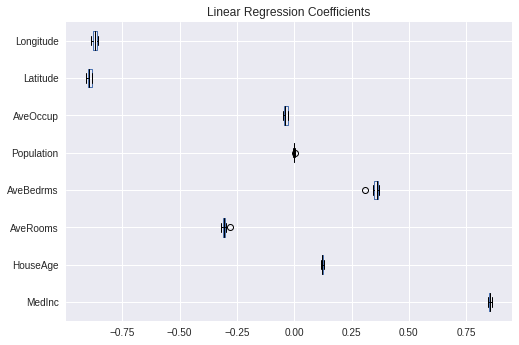

In [29]:
coefs = [est[-1].coef_ for est in lin_reg_cv_results['estimator']]
weights_df = pd.DataFrame(coefs, columns=feature_names)

color = {'whiskers':'black','medians':'black','caps':'black'}
weights_df.plot.box(color=color,vert=False)
plt.title('Linear Regression Coefficients')

In [30]:
weights_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.852153,0.122770,-0.304384,0.353528,-0.001576,-0.037059,-0.894011,-0.869753
std,0.005763,0.004312,0.010998,0.018044,0.003254,0.008582,0.009975,0.009097
min,0.843517,0.117394,-0.318971,0.307474,-0.005787,-0.047584,-0.908058,-0.884206
25%,0.848871,0.119895,-0.310778,0.349715,-0.002688,-0.042486,-0.901411,-0.876542
50%,0.852711,0.121592,-0.305795,0.360139,-0.002063,-0.042325,-0.895370,-0.869631
75%,0.854743,0.125520,-0.302980,0.364646,-0.000350,-0.027562,-0.883967,-0.862110
max,0.861659,0.130560,-0.278426,0.367952,0.005297,-0.026331,-0.881884,-0.857844


## Selecting best model



In [31]:
train_error = -1*lin_reg_cv_results['train_score']
test_error = -1*lin_reg_cv_results['test_score']

In [32]:
best_model_index = np.argmin(test_error)
selected_model = lin_reg_cv_results['estimator'][best_model_index]

In [34]:
print(selected_model['lin_reg'].intercept_)
print(selected_model['lin_reg'].coef_)

2.0779898917958657
[ 8.44324888e-01  1.18463901e-01 -3.04619574e-01  3.56620503e-01
  1.74458509e-04 -4.23964612e-02 -8.96045642e-01 -8.68906479e-01]


## Model Performance

In [35]:
from sklearn.model_selection import cross_val_predict
cv_predictions = cross_val_predict(lin_reg_pipeline, train_features, train_labels)

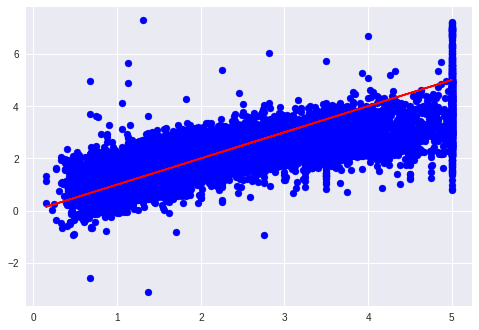

In [36]:
mse_cv = mean_squared_error(train_labels,cv_predictions)

plt.scatter(train_labels,cv_predictions, color='blue')
plt.plot(train_labels,train_labels,'-r')
plt.show()

# STEP 5: Predictions

We can use the best performing model from cross validation for getting predictions on the test set.

In [37]:
test_predictions_cv = selected_model.predict(test_features)
test_predictions_cv[:5]

array([0.73548515, 1.7725621 , 2.70011199, 2.83716602, 2.60743151])

We can also obtain predictions using the initial model that we built without cross validation.

In [38]:
test_predictions_cv = lin_reg_pipeline.predict(test_features)
test_predictions_cv[:5]

array([0.72412832, 1.76677807, 2.71151581, 2.83601179, 2.603755  ])

# STEP 6: Report model performance

In [39]:
score_cv = selected_model.score(test_features, test_labels)
score = lin_reg_pipeline.score(test_features, test_labels)
print(score_cv,score)

0.5923577635319088 0.5910509795491352
